## Graph 상에 임의로 Dot 을 찍어서 차수에 따른 그래프의 변화를 확인한다

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

### 1차원 그래프

자유도 : 모델을 표현할 수 있는 정도   
자유도가 높으면 오버피팅일어날 수 있는..?   

좋은 모델은 일반적으로 잘 통용되는 모델이다. 100% 다 맞추는 모델은 좋은 모델이 아니다.(오버피팅 일어날 수 있음)

In [ ]:
# 자유도 : 모델을 표현할 수 있는 정도 / 자유도가 높으면 오버피팅 일어날 수 있다. 
# 좋은 모델은 일반적으로 잘 통용되는 모델이다.

In [ ]:
X = np.arange(1, 11).reshape(10, 1)
y = np.array([7, 8, 7, 13, 16, 15, 19, 23, 18, 21]).reshape(10, 1)

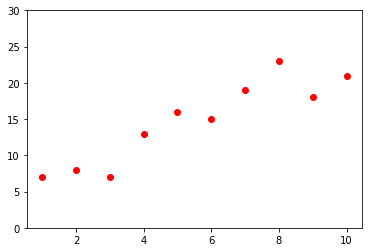

In [ ]:
plt.plot(X, y, 'ro') # bo = blue + circle / use go (green circle)

axes = plt.gca() #현재 figure의 축을 가져옴   # plt.gca같은 코드 기말 나올 수 있음   # gca = 그래프의 '축' 을 설정
axes.set_ylim([0,30])  # 축을 가져온 뒤 축에 y의 범위를 0부터 30까지

plt.show()

### Perform LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(X, y)

w0 = reg.intercept_  # b값(절편)
w1 = reg.coef_       # 기울기

print('w0 :', w0)
print('w1 :', w1)

w0 : [4.93333333]
w1 : [[1.77575758]]


#### 그래프 plotting

In [ ]:
y_pred = reg.predict(X)  # X데이터를 넣고 y데이터를 추측하는 것

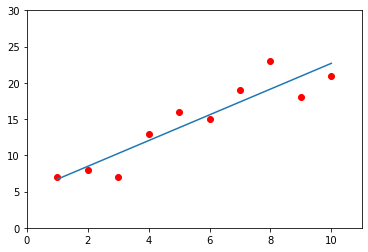

In [ ]:
plt.plot(X, y, 'ro')  # X에 대해서 실제 데이터 y
plt.plot(X, y_pred)   # X에 대해서 예측한 y

# gca = 그래프의 '축' 을 설정
axes = plt.gca()
axes.set_xlim([0, 11])
axes.set_ylim([0, 30]) # gca 를 이용해 y 의 범위를 0~30으로 늘려준다
plt.show()

### 2차원 그래프

In [ ]:
# np.c_ => 1차원 배열 두개를 col 방향으로 나열해서 concatenation
# 저번에는 PolynomialFeatures 함수를 써서 진행했었는데 이번에는 np로 진행

X_2 = np.c_[X, X**2]   # col으로 묶음
X_2

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

In [ ]:
reg = LinearRegression()
reg.fit(X_2, y)

w0 = reg.intercept_
w = reg.coef_

print('w0: ', w0)       # 상수값
print('w1: ', w[0][0])  # x값
print('w2: ', w[0][1])  # x의 제곱값

w0:  [2.43333333]
w1:  3.0257575757575768
w2:  -0.11363636363636374


In [ ]:
print(reg.coef_)

[[ 3.02575758 -0.11363636]]


#### 그래프를 그려보자

In [ ]:
y_pred_2 = reg.predict(X_2)

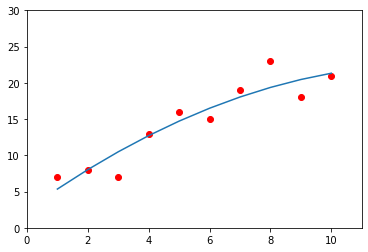

In [ ]:
plt.plot(X, y, 'ro')
plt.plot(X_2[:,0], y_pred_2)

# gca = 그래프의 '축' 을 설정
axes = plt.gca()
axes.set_xlim([0, 11])
axes.set_ylim([0, 30]) # gca 를 이용해 y 의 범위를 0~30으로 늘려준다
plt.show()

### 3차원 그래프

In [ ]:
# np.c_ => 1차원 배열 두개를 col 방향으로 나열해서 concatenation
X_3 = np.c_[X, X**2, X**3]
X_3

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]])

혹은

In [ ]:
from sklearn.preprocessing import PolynomialFeatures   # 다항회귀

# reg.intercept_에서 b절편을 쓸거라서 여기에서 bias를 쓰지 않음(False)
# bias를 포함시키지 않고, x를 3차원으로 바꿔줌(x는 만들어놓은 x이다.) 
polynomial = PolynomialFeatures(degree = 3, include_bias= False)  # degree = 3은 3차원으로 차원을 설정(변경)해주는 코드
X_3_poly = polynomial.fit_transform(X)   # 새로운 'X' 생성

In [ ]:
reg = LinearRegression()
reg.fit(X_3_poly, y)

w0 = reg.intercept_
w = reg.coef_

print(w)    # w는 3차원으로 만들어서 뽑아놓은 곱해지는 계수이다.

print('w0: ', w0 )
print('w1: ', w[0][0]) # <- x^1 에 곱해지는 w1
print('w2: ', w[0][1]) # <- x^2 에 곱해지는 w2
print('w3: ', w[0][2]) # <- x^3 에 곱해지는 w3

[[-1.2020202   0.8030303  -0.05555556]]
w0:  [7.2]
w1:  -1.2020202020202135
w2:  0.8030303030303007
w3:  -0.05555555555555525


x = 2 일때의 y 값은?

In [ ]:
x_2 = np.array([2,4,8])  # X, X^2, X^3
x_2

array([2, 4, 8])

In [ ]:
# X가 2일때, 2,4,8에 뽑아놓은 계수(w)를 곱해서 맨 마지막에 w0(bias->마지막에 더해지는 상수)  --> X가 2일때의 계수값을 알 수 있음

y_2 = (np.array([2,4,8]) @ w.reshape(-1,1)) + w0    # '@'는 행렬 곱을 의미한다.   # 2, 4, 8이라는 행이 있고 reshape(-1,1)이라는 열을 만들어서 곱해준다.
y_2

array([7.56363636])

In [ ]:
print(w)  # w는 3차원으로 만들어서 뽑아놓은 곱해지는 계수이다.
print("\n")
print(w.reshape(-1,1))   # 값 개수가 3개이기 때문에 reshape(3, 1)과 같은 의미이다.

[[-1.2020202   0.8030303  -0.05555556]]


[[-1.2020202 ]
 [ 0.8030303 ]
 [-0.05555556]]


혹은

In [ ]:
print(w[0][2] * 8 + w[0][1] * 4 + w[0][0] * 2 + 7.2)

7.563636363636334


w와 intercept 값을 이용해서 그래프를 새로 그려보자

In [ ]:
y_pred_3 = reg.predict(X_3_poly)   # 새로 predict

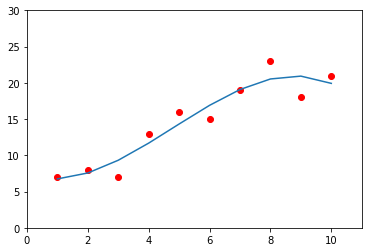

In [ ]:
plt.plot(X, y, 'ro')
plt.plot(X, y_pred_3)

# gca = 그래프의 '축' 을 설정
axes = plt.gca()
axes.set_xlim([0, 11])
axes.set_ylim([0, 30]) # gca 를 이용해 y 의 범위를 0~30으로 늘려준다
plt.show()

#### x 값의 범위를 좁게해서 그래프를 부드럽게

In [ ]:
# 그래프를 부드럽게 만들기 위해
X_new = np.arange(-5, 15, 0.01).reshape(-1,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree = 3, include_bias = False)
X_new_3 = polynomial.fit_transform(X_new)

y_pred_3 = (X_new_3 @ w.reshape(-1,1)) + w0

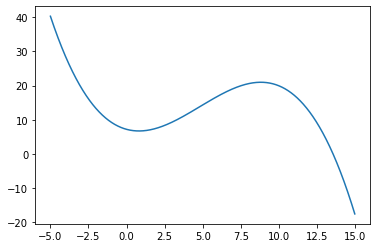

In [ ]:
plt.plot(X_new, y_pred_3)

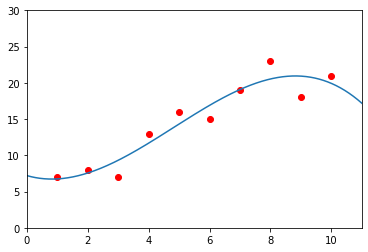

In [ ]:
plt.plot(X, y, 'ro')
plt.plot(X_new, y_pred_3)

# gca = 그래프의 '축' 을 설정
axes = plt.gca()
axes.set_xlim([0, 11])
axes.set_ylim([0, 30]) # gca 를 이용해 y 의 범위를 0~30으로 늘려준다
plt.show()

## 7차원 그래프

In [ ]:
polynomial = PolynomialFeatures(degree = 7, include_bias = False)
X_7 = polynomial.fit_transform(X)
X_7

array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00],
       [2.000000e+00, 4.000000e+00, 8.000000e+00, 1.600000e+01,
        3.200000e+01, 6.400000e+01, 1.280000e+02],
       [3.000000e+00, 9.000000e+00, 2.700000e+01, 8.100000e+01,
        2.430000e+02, 7.290000e+02, 2.187000e+03],
       [4.000000e+00, 1.600000e+01, 6.400000e+01, 2.560000e+02,
        1.024000e+03, 4.096000e+03, 1.638400e+04],
       [5.000000e+00, 2.500000e+01, 1.250000e+02, 6.250000e+02,
        3.125000e+03, 1.562500e+04, 7.812500e+04],
       [6.000000e+00, 3.600000e+01, 2.160000e+02, 1.296000e+03,
        7.776000e+03, 4.665600e+04, 2.799360e+05],
       [7.000000e+00, 4.900000e+01, 3.430000e+02, 2.401000e+03,
        1.680700e+04, 1.176490e+05, 8.235430e+05],
       [8.000000e+00, 6.400000e+01, 5.120000e+02, 4.096000e+03,
        3.276800e+04, 2.621440e+05, 2.097152e+06],
       [9.000000e+00, 8.100000e+01, 7.290000e+02, 6.561000e+03,
        5.904900

In [ ]:
reg = LinearRegression()
reg.fit(X_7, y)

w0 = reg.intercept_
w = reg.coef_

print(w,"\n")

print('w0: ', w0 ) # <- x^0 에 곱해지는 w0
print('w1: ', w[0][0]) # <- x^1 에 곱해지는 w1
print('w2: ', w[0][1]) # <- x^2 에 곱해지는 w2
print('w3: ', w[0][2]) # <- x^3 에 곱해지는 w3
print('w4: ', w[0][3]) # <- x^4 에 곱해지는 w4
print('w5: ', w[0][4]) # <- x^5 에 곱해지는 w5
print('w6: ', w[0][5]) # <- x^6 에 곱해지는 w6
print('w7: ', w[0][6]) # <- x^7 에 곱해지는 w7

[[ 2.78539902e+02 -2.37257520e+02  9.94563697e+01 -2.25924743e+01
   2.83667485e+00 -1.84910131e-01  4.87861813e-03]] 

w0:  [-113.80000047]
w1:  278.5399021806267
w2:  -237.25751981363024
w3:  99.45636974024056
w4:  -22.592474308015067
w5:  2.8366748460611313
w6:  -0.18491013134342538
w7:  0.004878618130533141


x = 2 일때의 값을 구해보자

In [ ]:
y_2 = (np.array([2,4,8,16,32,64,128]) @ w.reshape(-1, 1)) + w0
y_2

array([7.98490342])

In [ ]:
print(w[0][6] * 128 + w[0][5] * 64 + w[0][4] * 32 + w[0][3] * 16 + w[0][2] * 8 + w[0][1] * 4 + w[0][0] * 2 + w0)

[7.98490342]


In [ ]:
reg.coef_   # 값 개수가 7개

array([[ 2.78539902e+02, -2.37257520e+02,  9.94563697e+01,
        -2.25924743e+01,  2.83667485e+00, -1.84910131e-01,
         4.87861813e-03]])

In [ ]:
# coef_.reshape 를 알아 볼 수 있게 다시 표현

# '열(column)' 차원의 '정수'에 따라서 7개의 원소가 빠짐없이 배치될 수 있도록 '-1'이 들어가 있는 '행(row)' 의 개수가 가변적으로 정해짐
# for문이 돌면서 reg.coef_.reshape(-1,) 값이 X에 들어감
print([ "{:0.3f}".format(X) for X in reg.coef_.reshape(-1,)])  # reg.coef_ 값 개수가 7개이기 때문에 reshape(7, )와 같은 표현이다.

# w 값이 기형적으로 변하는 것을 볼 수 있다.

['278.540', '-237.258', '99.456', '-22.592', '2.837', '-0.185', '0.005']


w와 intercept 값을 이용해서 그래프를 새로 그려보자

In [ ]:
# 그래프를 그릴 y 값 구하기
y_7 = (X_7 @ w.reshape(-1,1)) + w0

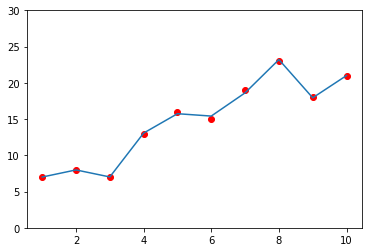

In [ ]:
plt.plot(X, y, 'ro')
plt.plot(X, y_7)

# gca = 그래프의 '축' 을 설정
axes = plt.gca()
axes.set_ylim([0, 30]) # gca 를 이용해 y 의 범위를 0~30으로 늘려준다
plt.show()

# 모든 데이터에 다 맞추려고 하는 오버피팅 발생

### x 값의 범위를 좁게해서 그래프를 연결되게 그려보자

In [ ]:
X_new = np.arange(1, 10.5, 0.01).reshape(-1,1)

polynomial = PolynomialFeatures(degree = 7, include_bias = False)
X_new_7 = polynomial.fit_transform(X_new)

In [ ]:
# 그래프를 그릴 y 값 구하기
y_7_new = (X_new_7 @ reg.coef_.reshape(-1,1)) + reg.intercept_

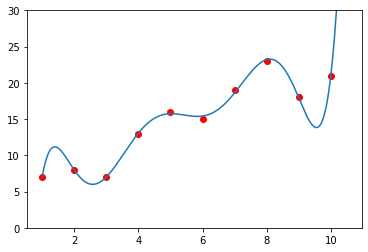

In [ ]:
plt.plot(X, y, 'ro')
plt.plot(X_new, y_7_new)

# gca = 그래프의 '축' 을 설정
axes = plt.gca()
axes.set_ylim([0, 30]) # gca 를 이용해 y 의 범위를 0~30으로 늘려준다
plt.show()

## 가장 피해야 할 것중 하나인 overfitting 을 방지해보자

#### Ridge method

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha = 1.0)  # 일반적으로 림다로 표시

ridge.fit(X_7, y)
y_pred_ridge = ridge.predict(X_7)

In [ ]:
w0 = ridge.intercept_
w = ridge.coef_

print(w,"\n")

print('w0: ', w0 ) # <- x^0 에 곱해지는 w0
print('w1: ', w[0][0]) # <- x^1 에 곱해지는 w1
print('w2: ', w[0][1]) # <- x^2 에 곱해지는 w2
print('w3: ', w[0][2]) # <- x^3 에 곱해지는 w3
print('w4: ', w[0][3]) # <- x^4 에 곱해지는 w4
print('w5: ', w[0][4]) # <- x^5 에 곱해지는 w5
print('w6: ', w[0][5]) # <- x^6 에 곱해지는 w6
print('w7: ', w[0][6]) # <- x^7 에 곱해지는 w7

[[-2.34723213e-01 -9.30910788e-02  6.16961612e-01 -2.74594733e-01
   5.50301417e-02 -5.15343046e-03  1.80531321e-04]] 

w0:  [6.52078565]
w1:  -0.23472321256704515
w2:  -0.09309107877150614
w3:  0.6169616124214852
w4:  -0.2745947331741506
w5:  0.055030141728562056
w6:  -0.005153430456323159
w7:  0.00018053132147908478


In [ ]:
# coef_.reshape 를 알아 볼 수 있게 다시 표현
print([ "{:0.3f}".format(x) for x in w.reshape(-1,)])   # weight들을 row로 모아서(정렬해서) 출력

['-0.235', '-0.093', '0.617', '-0.275', '0.055', '-0.005', '0.000']


#### 그래프를 다시 제대로 그려보자

In [ ]:
# 그래프가 부드러운 모양이 되도록 X_new_7 을 이용
y_pred_ridge = ridge.predict(X_new_7)

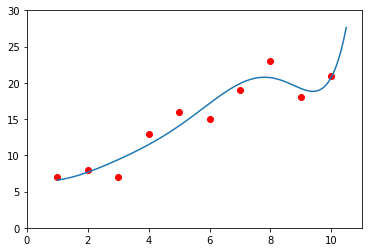

In [ ]:
plt.plot(X, y, 'ro')
plt.plot(X_new, y_pred_ridge)

# gca = 그래프의 '축' 을 설정
axes = plt.gca()
axes.set_xlim([0, 11])
axes.set_ylim([0, 30]) # gca 를 이용해 y 의 범위를 0~30으로 늘려준다
plt.show()

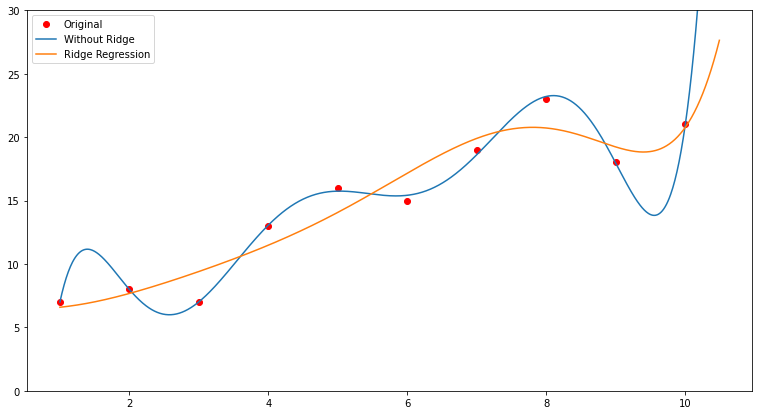

In [ ]:
plt.figure(figsize=(13,7))

plt.plot(X, y, 'ro')
plt.plot(X_new, y_7_new)
plt.plot(X_new, y_pred_ridge)

plt.legend(['Original','Without Ridge','Ridge Regression'])

# gca = 그래프의 '축' 을 설정
axes = plt.gca()
axes.set_ylim([0, 30]) # gca 를 이용해 y 의 범위를 0~30으로 늘려준다
plt.show()


# 정규화되면 일반적으로 튀는 계수들이 없어진다. (곡선의 파동이 줄어든다.)